<a href="https://colab.research.google.com/github/angona-biswas/Lab-Report_1608028/blob/main/ID_1608028_Lab_Report_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chittagong University of Engineering & Technology**


*Department of*

# Electronics & Telecommunication Engineering

Course Code: ETE 456

Course Title: Machine Learning Sessional

Report No.: 2

Experiment Name: Exploring different types of Classification Algorithms 

**Pericular task **

Experiment Date: 1.12.2021

Submission Date: 20. 12. 2021

Submitted To:  Lecturer, Eftekhar Hossain

Submitted By: 



	Name: Angona Biswas
	  ID: 1608028
     Level: 4
     Term: II


> **OBJECTIVES:** 
 1. To gather knowledge about different Machine Learning classification algorithms
 2. To apply various classification algorithms on a real world dataset.

 > **KEY FINDINGS OF THIS EXPERIMENT:**

 The workflow of this experiment is written using bullet points: 
 1. Importing the functions, dataset load, dataset read.
 2. Data Preprocessing: Checking the missing value of the dataset and handling the missing values.
 3. Declaring features and target of this dataset.

 4. Data Preprocessing: Encoding the categorical data using One Hot Encoding and declaring the new converted features again for clasification. 
 5. Data Spliting for training and test, where 80% data is taken for training and 20% data for test. 
 6. Data Preprocessing: Data normalization if necessary and observe the further effect. 
 7. Fitting the classifier models (Logistic Regession, K-Nearest Neighbour, Support Vector Machine, Decision Tree, Random Forest Classifier and Gaussian Naive Bayes) for  train dataset.
 8. Making prediction based on these models with test data and plot the confusin matrices and evaluate other evaluation parameters. 
 9. Making exploratory Data Analysis using 'Pandas Profiling', 'Klib' and finds the effective feature (most correlated features) from the dataset. Observing the correlation plot.
 10. After selecting the best features, repeat the same procedure of mentioned step 7 and step 8. Observing the evaluation parameters and confusin matrices. 
 11. Conclude the all types of analysis at the 'CONCLUSION' section. 


 

**CODE AND OUTPUTS:** 

In [ ]:
 import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-12 04:12:18--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-12 04:12:18--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb27d7f05b6ac5d1a95a5edbc5e.dl.dropboxusercontent.com/cd/0/inline/BbrDK4nR_HpWFec14R6gL7OWua8Ue6c1S0qeZPhyKuZxoFXRUa7UpgsXu5pXeNBAnbfwTlhszpICLdwiEMWh2usXelravj8N_A5jSIyJuMLmDyheLyhAVGzozK-O-Tp_OSc6M_C1kSoJxmxRvdFB8p8S/file# [following]
--2021-12-12 04:12:19--  https://ucb27d7f05b6ac5d1a95a5edbc5e.dl.dropboxusercontent.com/cd/0/inline/BbrDK4nR_HpWFec14R6

In [ ]:
# importing the dataset
dataset = pd.read_csv('stroke-data.csv')
dataset

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

In [ ]:
# Check the missing value of the dataset 
# Check the each column 
dataset[pd.isnull(dataset.bmi)]

id  gender   age  ...  bmi   smoking_status stroke
1     51676  Female  61.0  ...  NaN     never smoked      1
8     27419  Female  59.0  ...  NaN          Unknown      1
13     8213    Male  78.0  ...  NaN          Unknown      1
19    25226    Male  57.0  ...  NaN          Unknown      1
27    61843    Male  58.0  ...  NaN          Unknown      1
...     ...     ...   ...  ...  ...              ...    ...
5039  42007    Male  41.0  ...  NaN  formerly smoked      0
5048  28788    Male  40.0  ...  NaN           smokes      0
5093  32235  Female  45.0  ...  NaN           smokes      0
5099   7293    Male  40.0  ...  NaN           smokes      0
5105  18234  Female  80.0  ...  NaN     never smoked      0

[201 rows x 12 columns]

In [ ]:
Data Preprocessing:

In [ ]:
print(dataset.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# There is missing data which we obtained from checking the dataset at the 'bmi' column. 
# So missing data handling is necessary. Here 201 rows are suffering from missing data. So, it's better not to drop 201 rows and better to 

In [ ]:
# Handling the missing value; Filling the Missing Values – Imputation

dataset['bmi']=dataset['bmi'].fillna(dataset['bmi'].mean())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset

id  gender   age  ...        bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.600000  formerly smoked      1
1     51676  Female  61.0  ...  28.893237     never smoked      1
2     31112    Male  80.0  ...  32.500000     never smoked      1
3     60182  Female  49.0  ...  34.400000           smokes      1
4      1665  Female  79.0  ...  24.000000     never smoked      1
...     ...     ...   ...  ...        ...              ...    ...
5105  18234  Female  80.0  ...  28.893237     never smoked      0
5106  44873  Female  81.0  ...  40.000000     never smoked      0
5107  19723  Female  35.0  ...  30.600000     never smoked      0
5108  37544    Male  51.0  ...  25.600000  formerly smoked      0
5109  44679  Female  44.0  ...  26.200000          Unknown      0

[5110 rows x 12 columns]

In [ ]:
dataset.smoking_status.fillna("Unknown")

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [ ]:
# Declare the features and the Target
feature = dataset[['gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]  # for independent
target = dataset[['stroke']]   # for dependent

In [ ]:
# Encode the categorical data using One Hot Encoding 
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(feature[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]))
encoded_labels.columns = encoder.get_feature_names(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
dataset_1= pd.concat([feature, encoded_labels, target ], axis=1)
dataset_1

gender   age  ...  smoking_status_smokes  stroke
0       Male  67.0  ...                    0.0       1
1     Female  61.0  ...                    0.0       1
2       Male  80.0  ...                    0.0       1
3     Female  49.0  ...                    1.0       1
4     Female  79.0  ...                    0.0       1
...      ...   ...  ...                    ...     ...
5105  Female  80.0  ...                    0.0       0
5106  Female  81.0  ...                    0.0       0
5107  Female  35.0  ...                    0.0       0
5108    Male  51.0  ...                    0.0       0
5109  Female  44.0  ...                    0.0       0

[5110 rows x 27 columns]

In [ ]:
# Declare the features and the Target
en_feature = dataset_1[['gender_Female','gender_Male', 'gender_Other', 'age', 'hypertension', 'heart_disease', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked','smoking_status_smokes']]  # for independent
en_target = dataset_1[['stroke']]

In [ ]:
# Dataset Spliting into Training and Test Set
#80% data is taken for training and 20% data for test
X_train,X_test,y_train,y_test=train_test_split(en_feature,target,test_size = 0.2,random_state = 0)


In [ ]:
#Observe the shape of train set and test shape 
print(X_train.shape)
print(X_test.shape)

(4088, 21)
(1022, 21)


In [ ]:
# Feature Scaling is not necessary as there is no large value in actual dataset columns but after one hot encoding 'bmi' value become large. So this 'bmi' column is normalized as following process:   
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train[['bmi']])
X_test = X_sc.transform(X_test[['bmi']])


In [ ]:
Machine Learning Classifier Models: 

In [ ]:
# Logistic Regression Classification
# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)
# prediction
y_pred_lr = lr.predict(X_test)

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred_lr)

array([[968,   0],
       [ 54,   0]])

In [ ]:
# Using KNN Classifier
# Classifier Model
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn.fit(X_train,y_train)
# Prediction
y_pred_knn = knn.predict(X_test)

In [ ]:
# SVM Classifier Model
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train,y_train)
# Prediction
y_pred_svm = svm.predict(X_test)

In [ ]:
# Using Decision Tree Classifier
# Classifier Model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train,y_train)
# Prediction
y_pred_dt = dt.predict(X_test)

In [ ]:
# Using Random Forest Classifier
# Classifier Model
rf = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
rf.fit(X_train,y_train)
# Prediction
y_pred_rf = rf.predict(X_test)

In [ ]:
#Using Gaussin naive bias Classifier Model 
gnb = GaussianNB()
gnb.fit(X_train,y_train)
# Prediction
y_pred_gnb = gnb.predict(X_test)

[[968   0]
 [ 53   1]]


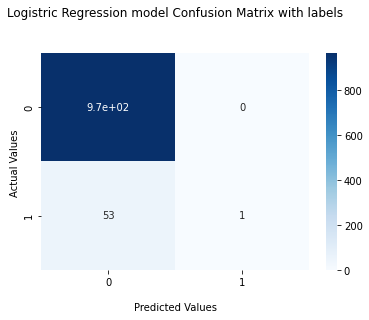

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [ ]:
# Making confusing matrix for Logistic Regression Classifier model

print(confusion_matrix(y_test,y_pred_lr))
cf_matrix= confusion_matrix(y_test,y_pred_lr)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistric Regression model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_lr,target_names = ['No','Yes']))

[[962   6]
 [ 53   1]]


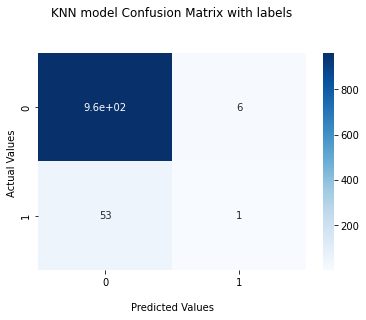

              precision    recall  f1-score   support

          No       0.95      0.99      0.97       968
         Yes       0.14      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [ ]:
# Making confusing matrix KNN model

print(confusion_matrix(y_test,y_pred_knn))
cf_matrix= confusion_matrix(y_test,y_pred_knn)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('KNN model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_knn,target_names = ['No','Yes']))

In [ ]:
# Making confusing matrix for SVM model

print(confusion_matrix(y_test,y_pred_svm))
cf_matrix= confusion_matrix(y_test,y_pred_svm)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('SVM model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_svm,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]


              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



[[933  35]
 [ 48   6]]


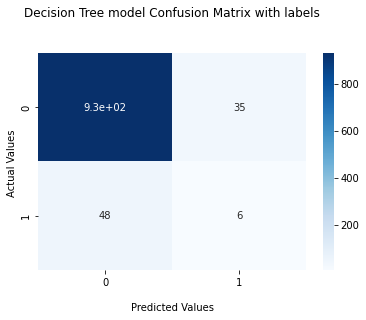

              precision    recall  f1-score   support

          No       0.95      0.96      0.96       968
         Yes       0.15      0.11      0.13        54

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



In [ ]:
# Making confusing matrix for Decision Tree

print(confusion_matrix(y_test,y_pred_dt))
cf_matrix= confusion_matrix(y_test,y_pred_dt)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Decision Tree model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_dt,target_names = ['No','Yes']))

[[965   3]
 [ 52   2]]


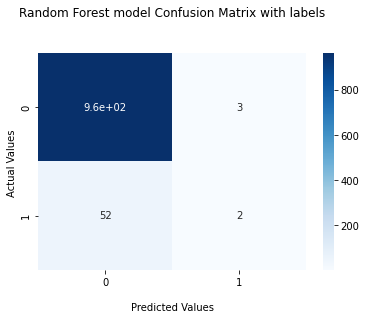

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



In [ ]:
# Making confusing matrix for Random Forest Classifier

print(confusion_matrix(y_test,y_pred_rf))
cf_matrix= confusion_matrix(y_test,y_pred_rf)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Random Forest model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_rf,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]


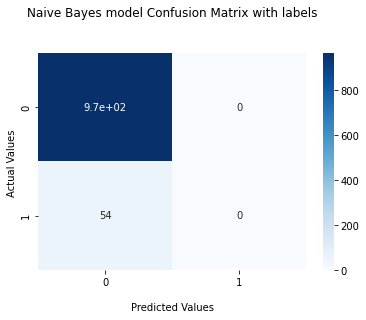

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [ ]:
# Making confusing matrix Naive Bayes model

print(confusion_matrix(y_test,y_pred_gnb))
cf_matrix= confusion_matrix(y_test,y_pred_gnb)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Naive Bayes model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_gnb,target_names = ['No','Yes']))

In [ ]:
# Using Pandas Profiling

!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 259 kB 7.6 MB/s 
     |████████████████████████████████| 675 kB 56.3 MB/s 
     |████████████████████████████████| 59 kB 8.6 MB/s 
     |████████████████████████████████| 4.7 MB 41.6 MB/s 
     |████████████████████████████████| 812 kB 76.0 MB/s 
     |████████████████████████████████| 38.1 MB 375 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7a91090a3a30b12fd038a4c0354dee54ec90dae369078da061e8fe68f92d27f7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=dfc7d882f01b62cb29959cf3631f2161d1a632c7591eb001ac7c293e9a09ff33
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
# # Standard Library Imports # from pathlib import Path # Installed packages
import pandas as pd
from ipywidgets import widgets
# Our package
from pandas_profiling import ProfileReport

In [ ]:
### To Create the Simple report quickly
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

In [ ]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Or use the HTML report in an iframe
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Find the Feature Correlation to use effective features for the classifers

In [ ]:
! pip install klib

In [ ]:
import klib

In [ ]:
klib.corr_mat(dataset_1) # returns a color-encoded correlation matrix

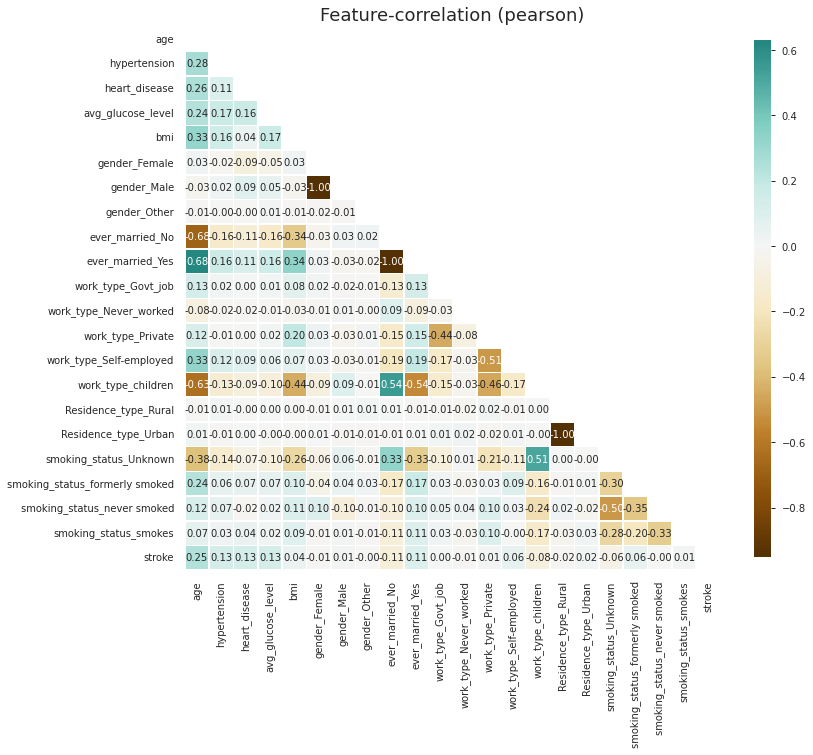

In [ ]:
klib.corr_plot(dataset_1)

In [ ]:
From this given analysis, we can see that 'gender', 'work_type', 'Residence_type', 'smoking status'- these have less relation with target column. 
Now we can get the idea about effctive features from this analysis and utilizing these features only, we can classify stroke.  

In [ ]:
# Declare the features and the Target
select_feature = dataset_1[['age', 'hypertension', 'heart_disease', 'ever_married_No', 'ever_married_Yes', 'avg_glucose_level', 'bmi']]  # for independent
select_target = dataset_1[['stroke']]

In [ ]:
# Dataset Spliting into Training and Test Set
#80% data is taken for training and 20% data for test
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(select_feature,select_target,test_size = 0.2,random_state = 0)

In [ ]:
# Train the classifier moddels again for selected features: 
# Logistic Regression Classification
# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()
lr.fit(X_train_s,y_train_s)
# prediction
y_pred_lr = lr.predict(X_test_s)

# Using KNN Classifier
# Classifier Model
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn.fit(X_train_s,y_train_s)
# Prediction
y_pred_knn = knn.predict(X_test_s)

# SVM Classifier Model
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train_s,y_train_s)
# Prediction
y_pred_svm = svm.predict(X_test_s)

# Using Decision Tree Classifier
# Classifier Model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_s,y_train_s)
# Prediction
y_pred_dt = dt.predict(X_test_s)

# Using Random Forest Classifier
# Classifier Model
rf = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
rf.fit(X_train_s,y_train_s)
# Prediction
y_pred_rf = rf.predict(X_test_s)

# Classifier Model
gnb = GaussianNB()
gnb.fit(X_train_s,y_train_s)
# Prediction
y_pred_gnb = gnb.predict(X_test_s)

In [ ]:
# Making confusing matrix for Logistic Regression model
print(confusion_matrix(y_test_s,y_pred_lr))
cf_matrix= confusion_matrix(y_test_s,y_pred_lr)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistric Regression model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_lr,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]


              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



[[962   6]
 [ 53   1]]


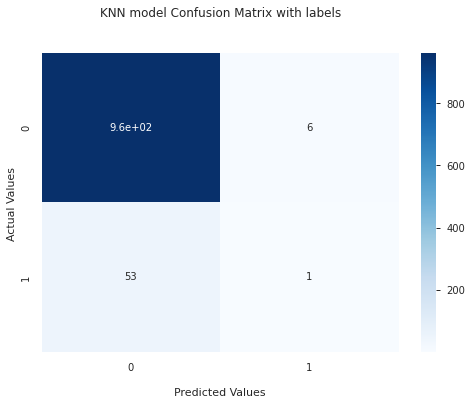

              precision    recall  f1-score   support

          No       0.95      0.99      0.97       968
         Yes       0.14      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [ ]:
# Making confusing matrix KNN model
print(confusion_matrix(y_test_s,y_pred_knn))
cf_matrix= confusion_matrix(y_test_s,y_pred_knn)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('KNN model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_knn,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]


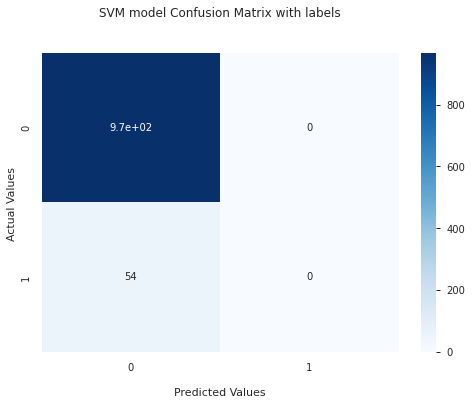

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [ ]:
# Making confusing matrix for SVM model
print(confusion_matrix(y_test_s,y_pred_svm))
cf_matrix= confusion_matrix(y_test_s,y_pred_svm)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('SVM model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_svm,target_names = ['No','Yes']))

[[922  46]
 [ 48   6]]


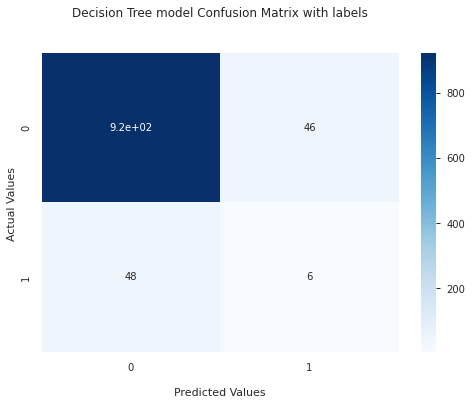

              precision    recall  f1-score   support

          No       0.95      0.95      0.95       968
         Yes       0.12      0.11      0.11        54

    accuracy                           0.91      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.91      0.91      1022



In [ ]:
# Making confusing matrix for Decision Tree
print(confusion_matrix(y_test_s,y_pred_dt))
cf_matrix= confusion_matrix(y_test_s,y_pred_dt)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Decision Tree model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_dt,target_names = ['No','Yes']))

In [ ]:
# Making confusing matrix for Random Forest Classifier
print(confusion_matrix(y_test_s,y_pred_rf))
cf_matrix= confusion_matrix(y_test_s,y_pred_rf)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Random Forest model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix  # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_rf,target_names = ['No','Yes']))

[[961   7]
 [ 53   1]]


              precision    recall  f1-score   support

          No       0.95      0.99      0.97       968
         Yes       0.12      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.54      0.51      0.50      1022
weighted avg       0.90      0.94      0.92      1022



In [ ]:
# Making confusing matrix Naive Bayes model
print(confusion_matrix(y_test_s,y_pred_gnb))
cf_matrix= confusion_matrix(y_test_s,y_pred_gnb)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Naive Bayes model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix # it is used to check the accuracy of the classification
print(classification_report(y_test_s,y_pred_gnb,target_names = ['No','Yes']))

[[870  98]
 [ 27  27]]


              precision    recall  f1-score   support

          No       0.97      0.90      0.93       968
         Yes       0.22      0.50      0.30        54

    accuracy                           0.88      1022
   macro avg       0.59      0.70      0.62      1022
weighted avg       0.93      0.88      0.90      1022



In [ ]:
CONCLUSION: 

In [ ]:
From above result analysis, the following things can be concluded:

1. Confusion Matrix analysis without data normalizing and feature selection:
(a) LogisticRegression:- accuracy: 95%; precision: 47%; recall: 50%; f1-score: 49%.
(b) K-Nearest Neighbor:- accuracy: 95%; precision: 55%; recall: 51%; f1-score: 50%.
(c) Support Vector Machine:- accuracy: 95%; precision: 47%; recall: 50%; f1-score: 49%.
(d) DecisionTreeClassifier:- accuracy: 92%; precision: 55%; recall: 54%; f1-score: 54%.
(e) RandomForestClassifier:- accuracy: 95%; precision: 67%; recall: 52%; f1-score: 52%.
(f) GaussianNB:- accuracy: 95%; precision: 47%; recall: 50%; f1-score: 49%.

2. Confusion Matrix analysis with data normalizing and without feature selection:
(a) LogisticRegression:- accuracy: 95%; 
(b) K-Nearest Neighbor:- accuracy: 95%; 
(c) Support Vector Machine:- accuracy: 95%; 
(d) DecisionTreeClassifier:- accuracy: 95%; 
(e) RandomForestClassifier:- accuracy: 95%; 
(f) GaussianNB:- accuracy: 95%; 

3. Confusion Matrix analysis after feature selection:
(a) LogisticRegression:- accuracy: 95%; precision: 47%; recall: 50%; f1-score: 49%.
(b) K-Nearest Neighbor:- accuracy: 95%; precision: 55%; recall: 51%; f1-score: 50%.
(c) Support Vector Machine:- accuracy: 95%; precision: 47%; recall: 50%; f1-score: 49%.
(d) DecisionTreeClassifier:- accuracy: 91%; precision: 53%; recall: 53%; f1-score: 53%.
(e) RandomForestClassifier:- accuracy: 94; precision: 54%; recall: 51%; f1-score: 50%.
(f) GaussianNB:- accuracy: 88%; precision: 59% ; recall: 70%; f1-score: 62%.

From the analysis, the conclusion is maximum 95% classification accuracy can be obtained from Machine Learning model classification using given features. 
Here, LR, SVM, RF classifiers are proving the best prediction for different cases. 